In [30]:
# Question 3
import numpy as np 


class SVM:

    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None


    def fit(self, X, y):
        
        n_samples, n_features = 10 , 2
        
        y_ = np.where(y <= 0, -1, 1)
        
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]


    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

[0.64446046 0.17853378] 2.1039999999998793
9.980015026833492
-5.902839703253325


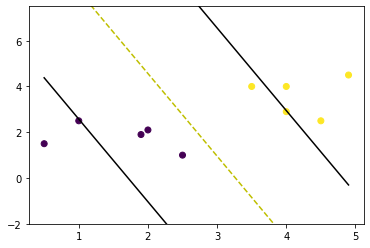

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


X = np.array([np.array([4,2.9]) , 
              np.array([4,4]) , 
              np.array([1,2.5]) , 
              np.array([2.5 , 1]) , 
              np.array([4.9,4.5]) , 
              np.array([1.9,1.9]) , 
              np.array([3.5,4]) , 
              np.array([0.5,1.5]),
              np.array([2,2.1]) , 
              np.array([4.5,2.5])
             ])
y = np.array([1,1,-1,-1,1,-1,1,-1,-1,1])



clf = SVM()
clf.fit(X, y)
#predictions = clf.predict(X)
 
print(clf.w, clf.b)

def get_hyperplane_value(x, w, b, offset):
    return (-w[0] * x + b + offset) / w[1]
def visualize_svm():
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X[:,0], X[:,1], marker='o',c=y)

    x0_1 = np.amin(X[:,0])
    x0_2 = np.amax(X[:,0])

    x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
    x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)
    
    print(x1_1)
    print(x1_2)

    x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

    x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

    ax.plot([x0_1, x0_2],[x1_1, x1_2], 'y--')
    ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
    ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')

    x1_min = np.amin(X[:,1])
    x1_max = np.amax(X[:,1])
    ax.set_ylim([x1_min-3,x1_max+3])

    plt.show()

visualize_svm()

In [ ]:
# hyper plane
def y(x):
    return 9.98 - 5.9 * x

In [33]:
point = (1.9 , 1.9)
dist = abs(-5.9*1.9 + 9.98)/5.9
dist

0.2084745762711865

In [34]:
test = np.array([3,3])
print(clf.predict(test))

1.0


In [3]:
# Question - 4
import pandas as pd
df = pd.read_csv("data/auto-mpg.csv", header=None, delimiter=r"\s+")
df

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [7]:
len(df[8].unique())

305